In [56]:
import pandas
from sklearn import (decomposition, preprocessing)
import numpy
import flowio
import seaborn
import matplotlib.pyplot as plt

In [57]:
fcs_data = flowio.FlowData('features.fcs')
npy_data = numpy.reshape(fcs_data.events, (-1, fcs_data.channel_count))
df = pandas.DataFrame(npy_data, columns=[c["PnN"] for c in fcs_data.channels.values()])

In [58]:
df.columns = ["feat_%s" % col if col not in ["set", "label"] else "meta_%s" % col for col in df]
df["index"] = numpy.arange(df.shape[0])

In [59]:
df = df[df["meta_label"] != -1]
df.loc[df["meta_set"] == 100, "meta_set"] = 1

In [60]:
df = df.drop(columns=(df.columns[df.var() == 0]))
df = df.drop(columns=df.filter(regex="saturation").columns)

In [61]:
dfs = []
for idx, gdf in df.groupby("meta_set"):
    X = gdf.drop(columns=["meta_set", "meta_label"])
    tmp_df = pandas.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
    tmp_df["meta_set"] = gdf["meta_set"].values
    tmp_df["meta_label"] = gdf["meta_label"].values
    dfs.append(tmp_df)
scaled_df = pandas.concat(dfs)

In [62]:
embed_df = pandas.DataFrame(index=df.index)

In [63]:
tmp = decomposition.PCA(n_components=2).fit_transform(scaled_df.drop(columns=["meta_set", "meta_label"]).values)
embed_df["feat_pca_0"] = tmp[:, 0]
embed_df["feat_pca_1"] = tmp[:, 1]

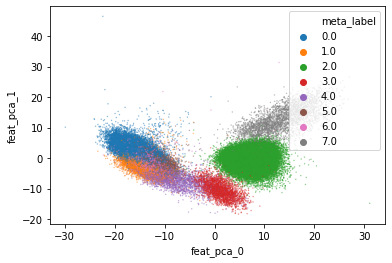

In [64]:
seaborn.scatterplot(data=pandas.concat([embed_df, df], axis=1), hue="meta_label", x="feat_pca_0", y="feat_pca_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

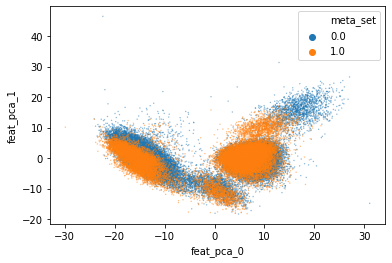

In [65]:
seaborn.scatterplot(data=pandas.concat([embed_df, df], axis=1), hue="meta_set", x="feat_pca_0", y="feat_pca_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

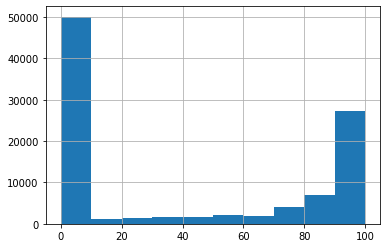

In [66]:
df["feat_aspectratiom07"].hist()

In [67]:
df.filter(regex="(area|maxpixel)")

,feat_maxpixelmccd15fitc,feat_rawmaxpixelm06ssc,feat_maxpixelmccd45v500,feat_maxpixelmcssc,feat_maxpixelmccd8apccy7,feat_rawmaxpixelmccd15fitc,feat_aream07,feat_maxpixelmcsiglec8pe,feat_rawmaxpixelmcssc,feat_aream01,...,feat_aream08,feat_maxpixelm09bf2,feat_rawmaxpixelmccd4bv605,feat_maxpixelm06ssc,feat_rawmaxpixelmccd14pecf594,feat_aream10,feat_rawmaxpixelm09bf2,feat_maxpixelm01bf1,feat_aream04,feat_rawmaxpixelmccd56apc
0,3.552632,158.0,104.622810,120.214912,4.508772,17.0,29.111111,8.690789,158.0,90.555557,...,113.444443,98.575218,59.0,120.214912,26.0,0.000000,862.0,81.504402,0.000000,36.0
1,2316.819336,429.0,73.324074,391.289337,3.590278,2332.0,0.000000,39.930557,429.0,118.777779,...,84.666664,175.921295,64.0,391.289337,34.0,0.000000,939.0,289.276733,1.333333,32.0
2,1380.486816,487.0,34.570175,449.193176,5.550438,1395.0,0.000000,43.105263,487.0,129.888885,...,92.444443,266.515350,62.0,449.193176,31.0,0.000000,1029.0,299.116241,71.000000,36.0
3,3325.104492,609.0,119.468285,571.050354,4.406716,3341.0,0.000000,41.876865,609.0,184.555557,...,107.111115,238.146072,63.0,571.050354,35.0,0.000000,1001.0,197.270523,1.333333,38.0
4,32.813492,146.0,161.065475,108.178574,6.039682,48.0,126.111115,23.589285,146.0,135.777771,...,136.444443,208.816727,158.0,108.178574,26.0,130.888885,975.0,122.308762,0.000000,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97999,64.301926,321.0,70.498077,283.398071,7.226923,79.0,1.000000,8.578846,321.0,169.111115,...,142.222229,195.984558,62.0,283.398071,94.0,0.000000,981.0,197.845566,119.333336,36.0
98000,38.877403,313.0,567.069702,275.807678,205.689911,52.0,22.000000,9.137019,313.0,107.333336,...,97.333336,212.362976,65.0,275.807678,25.0,8.777778,994.0,228.401443,0.000000,35.0
98001,16.965725,183.0,145.314514,145.872986,20.401209,31.0,124.444443,8.479838,183.0,123.000000,...,118.222221,139.485886,62.0,145.872986,27.0,0.000000,924.0,177.479843,0.000000,42.0
98002,483.891663,495.0,23.522917,457.402069,5.295833,500.0,0.000000,18.677084,495.0,129.777771,...,93.222221,210.422913,59.0,457.402069,32.0,0.000000,996.0,258.018738,0.000000,37.0


In [68]:
export_df = pandas.concat([embed_df[["feat_pca_0", "feat_pca_1"]], df.drop(columns=df.filter(regex='raw').columns)], axis=1)
for col in export_df:
    if(export_df[col].dtype == numpy.int64):
        export_df[col] = export_df[col].astype(numpy.int32)

export_df.reset_index(drop=True).to_feather("./demo.feather", compression="uncompressed")

In [11]:
import umap

In [140]:
dfs = []
for idx, gdf in df.groupby("meta_set"):
    X = gdf.drop(columns=["meta_set", "meta_label"])
    tmp_df = pandas.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)
    tmp_df["meta_set"] = gdf["meta_set"].values
    tmp_df["meta_label"] = gdf["meta_label"].values
    dfs.append(tmp_df)
minmax_df = pandas.concat(dfs)
minmax_df.loc[minmax_df["meta_set"] == 100, "meta_set"] = 1

In [12]:
tmp = umap.UMAP(n_components=2).fit_transform(df.drop(columns=["meta_set", "meta_label"]).values)
embed_df["feat_umap_0"] = tmp[:, 0]
embed_df["feat_umap_1"] = tmp[:, 1]

KeyboardInterrupt: 

In [ ]:
seaborn.scatterplot(data=pandas.concat([embed_df, df], axis=1), hue="meta_label", x="feat_umap_0", y="feat_umap_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

<AxesSubplot:xlabel='feat_umap_0', ylabel='feat_umap_1'>

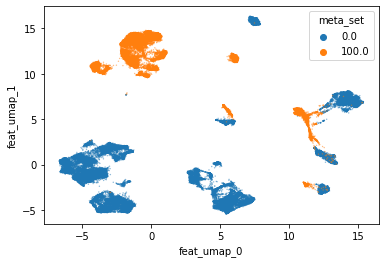

In [143]:
seaborn.scatterplot(data=pandas.concat([embed_df, df], axis=1), hue="meta_set", x="feat_umap_0", y="feat_umap_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

In [144]:
from sklearn.manifold import TSNE

In [12]:
tmp = TSNE().fit_transform(trans_df.drop(columns=["meta_set", "meta_label"]).values)
embed_df["feat_tsne_0"] = tmp[:, 0]
embed_df["feat_tsne_1"] = tmp[:, 1]

In [95]:
import pymde

In [97]:
tmp = pymde.preserve_neighbors(minmax_df.drop(columns=["meta_set", "meta_label"]).values, constraint=pymde.Standardized(), device="cuda", verbose=True).embed(verbose=True, max_iter=1000)
embed_df["feat_mde_nn_0"] = tmp[:, 0].cpu().numpy()
embed_df["feat_mde_nn_1"] = tmp[:, 1].cpu().numpy()

Jun 23 02:35:38 PM: Computing 15-nearest neighbors, with max_distance=None
Wed Jun 23 14:35:38 2021 Building RP forest with 22 trees
Wed Jun 23 14:35:39 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Jun 23 02:35:43 PM: Computing quadratic initialization.
Jun 23 02:35:51 PM: Fitting a standardized embedding into R^2, for a graph with 80654 items and 1237533 edges.
Jun 23 02:35:51 PM: `embed` method parameters: eps=1.0e-05, max_iter=1000, memory_size=10
Jun 23 02:35:51 PM: iteration 0000 | distortion 0.324335 | residual norm 0.0633104 | step length 0.158729 | percent change 0.00250209
Jun 23 02:35:53 PM: iteration 0100 | distortion 0.124478 | residual norm 9.08275e-05 | step length 1.01 | percent change 2.28408e-05
Jun 23 02:35:56 PM: iteration 0200 | distortion 0.124478 | residual norm 9.08273e-05 | step length 1.01 | percent change 2.28407e-05
Jun 23 02:35:59 PM: iteration 0300 | distortion 0.124478 | residual norm 9.08274

<AxesSubplot:xlabel='feat_mde_nn_0', ylabel='feat_mde_nn_1'>

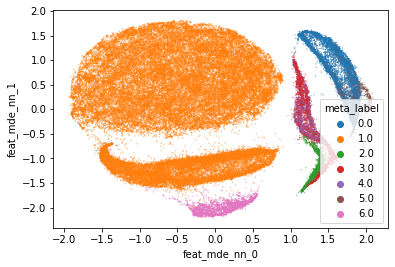

In [101]:
seaborn.scatterplot(data=pandas.concat([embed_df, trans_df], axis=1), hue="meta_label", x="feat_mde_nn_0", y="feat_mde_nn_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

<AxesSubplot:xlabel='feat_mde_nn_0', ylabel='feat_mde_nn_1'>

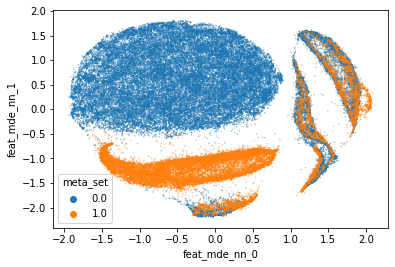

In [102]:
seaborn.scatterplot(data=pandas.concat([embed_df, trans_df], axis=1), hue="meta_set", x="feat_mde_nn_0", y="feat_mde_nn_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

In [125]:
dists = pymde.preprocess.distances(trans_df.drop(columns=["meta_set", "meta_label"]).values, retain_fraction=0.001)

In [110]:
tmp = pymde.preserve_distances(trans_df.drop(columns=["meta_set", "meta_label"]).values, max_distances=100000, device="cuda", verbose=True).embed(verbose=True, max_iter=15000)

Jun 23 02:51:53 PM: Sampling 100000 edges
Jun 23 02:51:53 PM: Computing 100000 distances
Jun 23 02:51:53 PM: Fitting a centered embedding into R^2, for a graph with 80654 items and 100000 edges.
Jun 23 02:51:53 PM: `embed` method parameters: eps=1.0e-05, max_iter=15000, memory_size=10
Jun 23 02:51:53 PM: iteration 00000 | distortion 24.316170 | residual norm 0.00633883 | step length 534854 | percent change 845.51
Jun 23 02:51:59 PM: iteration 01500 | distortion 0.090868 | residual norm 0.00393949 | step length 1 | percent change 0.00376756
Jun 23 02:52:05 PM: iteration 03000 | distortion 0.064299 | residual norm 0.00395541 | step length 1 | percent change 0.00178535
Jun 23 02:52:10 PM: iteration 04500 | distortion 0.051435 | residual norm 0.00385004 | step length 1 | percent change 0.000366359
Jun 23 02:52:15 PM: iteration 06000 | distortion 0.048405 | residual norm 0.00391488 | step length 1 | percent change 0.00149101
Jun 23 02:52:21 PM: iteration 07500 | distortion 0.038305 | residu

In [111]:
embed_df["feat_mde_dist_0"] = tmp[:, 0].cpu().numpy()
embed_df["feat_mde_dist_1"] = tmp[:, 1].cpu().numpy()

<AxesSubplot:xlabel='feat_mde_dist_0', ylabel='feat_mde_dist_1'>

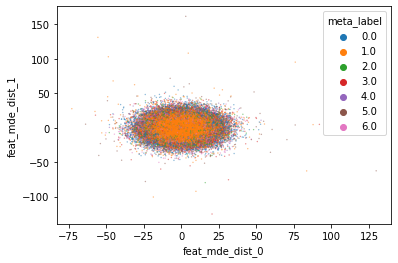

In [112]:
seaborn.scatterplot(data=pandas.concat([embed_df, trans_df], axis=1), hue="meta_label", x="feat_mde_dist_0", y="feat_mde_dist_1", s=2, alpha=0.5, linewidth=0, palette="tab10")

In [ ]:
fcs_data.text["class_labels"]

In [ ]:
seaborn.countplot(data=df, x="meta_label")

In [54]:
for col in trans_df:
    if(trans_df[col].dtype == numpy.int64):
        trans_df[col] = trans_df[col].astype(numpy.int32)

trans_df.reset_index(drop=True).to_feather("./demo_wbc.feather", compression="uncompressed")